# Plotting Scheduling Latency Data for SOSP

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from glob import glob
import numpy as np
import pprint
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

### Define methods

In [3]:
def load_scheduling_requestor_data(source_dir = '../meta/sched_latency_request/', read_labels=True, num_node_range = [1, 5, 10], num_res_range = [10, 100, 1000], num_req_range=[1, 10, 100, 1000, 10000]):
    data = {}
    for nodes in num_node_range:
        for res in num_res_range:
            for req in num_req_range:
                data[str(nodes) + '_' + str(res) + '_' + str(req)] = np.loadtxt(os.path.join(source_dir, "n{}_r{}_req{}.txt".format(nodes, res, req)))
    # Read labels:
    if read_labels:
        label_file_path = os.path.join(source_dir, "label.txt")
        with open(label_file_path, 'r') as f:
            labels = f.readline().split(",")
    return data, labels

def get_stats(data):
    mean_data = {}
    stddev_data = {}
    median_data = {}
    for k,v in data.items():
        mean_data[k] = np.mean(v, axis=0)
        stddev_data[k] = np.std(v, axis=0)
        median_data[k] = np.median(v, axis=0) 
    return mean_data, stddev_data, median_data


### Plotting methods

In [4]:
def plot_schedlatency_request_bars(mean_data, stddev_data, num_req_range, num_node, num_res, data_idx = 1):
    x_pos = np.arange(len(num_req_range))
    means = [mean_data["{}_{}_{}".format(num_node, num_res, num_req)][data_idx] for num_req in num_req_range]
    errors = [stddev_data["{}_{}_{}".format(num_node, num_res, num_req)][data_idx] for num_req in num_req_range]

    plt.bar(x_pos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.5)
    plt.ylabel('Seconds')
    plt.xlabel('Number of resources requested by task')
    plt.xticks(x_pos, [str(i) for i in num_req_range])
    plt.title('Task scheduling latency, {} nodes, {} resources in cluster'.format(num_node, num_res))

## Analysis


### Plot single node data

In [5]:
path = '../meta/final_data/sched_latency_request/'
num_node_range=[10]
num_res_range=[10000]
num_req_range=[1, 10, 50, 100, 500, 1000]
data, labels = load_scheduling_requestor_data(path, num_node_range=num_node_range, num_res_range=num_res_range, num_req_range=num_req_range)

In [6]:
mean_data, stddev_data, median_data = get_stats(data)
pprint.pprint(mean_data)

{'10_10000_1': array([0.0001523 , 0.01311922]),
 '10_10000_10': array([0.00016794, 0.01243076]),
 '10_10000_100': array([0.00060468, 0.01349521]),
 '10_10000_1000': array([0.00245399, 0.02673235]),
 '10_10000_50': array([0.00031033, 0.01464334]),
 '10_10000_500': array([0.00140958, 0.01703424])}


### Fixed num of nodes, variable resources

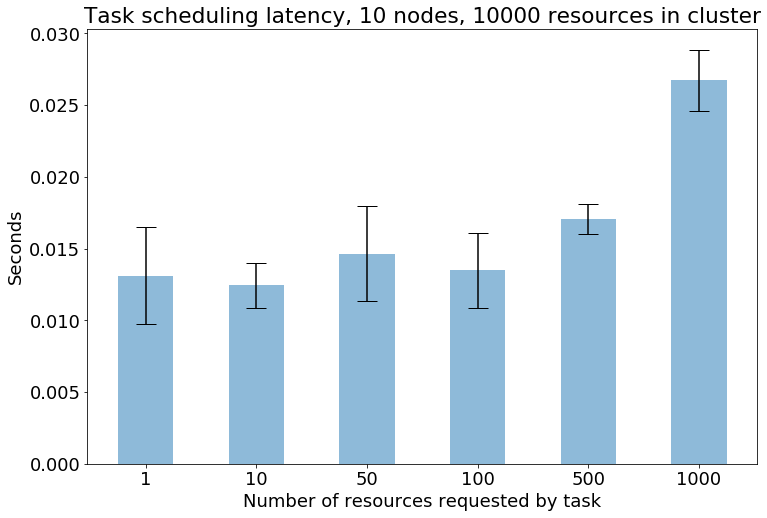

In [50]:
for num_nodes in num_node_range:
    for num_res in num_res_range:
        plt.figure()
        plot_schedlatency_request_bars(mean_data, stddev_data, num_req_range, num_nodes, num_res=num_res)
        #plt.ylim([0,0.015])

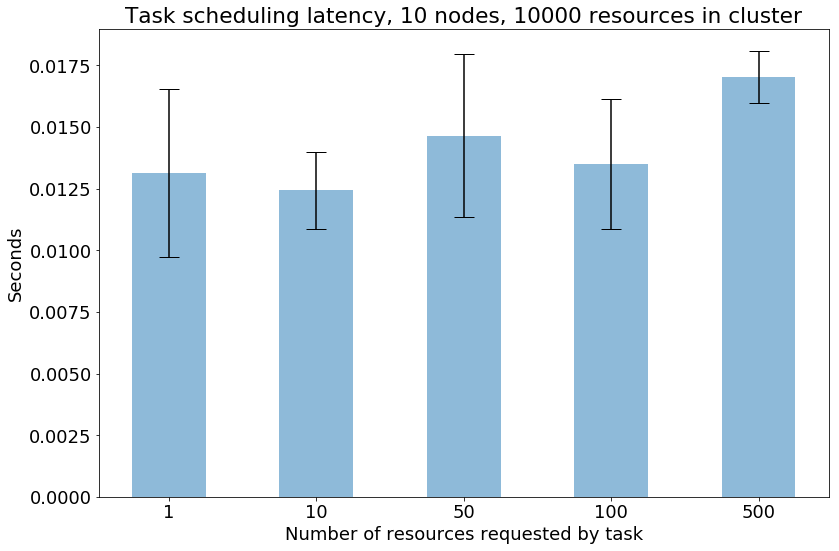

In [10]:
plot_num_req_range = [1,10,50,100,500]
plot_schedlatency_request_bars(mean_data, stddev_data, plot_num_req_range, 10, num_res=10000)
plt.savefig("../eval/final_plots/result_microbench_schedlatency_vs_resrequested.pdf")